<a href="https://colab.research.google.com/github/ITALOZDKJ/Me-tornando-um-analista-de-dados/blob/main/ambev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import of libs

In [ ]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose as sd
import pandas_datareader.data as web
import numpy as np

# Collect of negociation datas

In [ ]:
tricker = yf.Ticker('ABEV3.SA')

In [ ]:
ambev_d = tricker.history(interval='1d', start='2016-01-01', end='2021-10-27')
ambev_m = tricker.history(interval='1mo', start='2016-01-01', end='2021-10-27')

In [ ]:
ambev_m

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2016-01-01,15.325157,16.020584,13.728250,16.020584,261121600.0,0.00,0
2016-02-01,15.720093,16.157955,14.998909,15.144863,231477900.0,0.13,0
2016-03-01,15.372153,16.919742,15.277049,16.254019,404884000.0,0.00,0
2016-04-01,16.279956,16.885160,15.735275,16.764118,161692100.0,0.00,0
2016-05-01,16.729539,17.040785,15.821734,16.522041,270813800.0,0.00,0
...,...,...,...,...,...,...,...
2021-06-01,17.990000,19.860001,16.900000,17.070000,671274900.0,0.00,0
2021-07-01,16.860001,18.170000,16.530001,16.639999,483153600.0,0.00,0
2021-08-01,16.900000,17.670000,16.110001,17.100000,467801600.0,0.00,0


In [ ]:
ambev_m

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2016-01-01,15.325157,16.020584,13.728250,16.020584,261121600.0,0.00,0
2016-02-01,15.720093,16.157955,14.998909,15.144863,231477900.0,0.13,0
2016-03-01,15.372153,16.919742,15.277049,16.254019,404884000.0,0.00,0
2016-04-01,16.279956,16.885160,15.735275,16.764118,161692100.0,0.00,0
2016-05-01,16.729539,17.040785,15.821734,16.522041,270813800.0,0.00,0
...,...,...,...,...,...,...,...
2021-06-01,17.990000,19.860001,16.900000,17.070000,671274900.0,0.00,0
2021-07-01,16.860001,18.170000,16.530001,16.639999,483153600.0,0.00,0
2021-08-01,16.900000,17.670000,16.110001,17.100000,467801600.0,0.00,0


# Extraction of features

In [ ]:
ambev_d.reset_index(inplace=True)
ambev_m.reset_index(inplace=True)

In [ ]:
def features(x):
    x['Day'] = x['Date'].dt.day
    x['Month'] = x['Date'].dt.month
    x['Year'] = x['Date'].dt.year
    x['Rentability'] = (x['Close']/x['Close'].shift()) * 100 -100
    x['Rentability pure'] = x['Close'] - x['Close'].shift()

In [ ]:
features(ambev_d)
features(ambev_m)

In [ ]:
ambev_d

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Day,Month,Year,Rentability,Rentability pure
0,2016-01-04,15.222133,15.222133,14.775685,14.775685,13206900,0.0,0,4,1,2016,NaN,NaN
1,2016-01-05,14.810031,15.041841,14.689834,15.007498,10774200,0.0,0,5,1,2016,1.568878,0.231812
2,2016-01-06,14.904468,15.007494,14.767100,14.861540,7739100,0.0,0,6,1,2016,-0.972567,-0.145958
3,2016-01-07,14.741344,14.870126,14.466607,14.466607,15316400,0.0,0,7,1,2016,-2.657415,-0.394933
4,2016-01-08,14.535291,14.767101,14.535291,14.655488,10684000,0.0,0,8,1,2016,1.305634,0.188881
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1439,2021-10-20,15.300000,15.580000,15.210000,15.410000,19273600,0.0,0,20,10,2021,1.783352,0.270000
1440,2021-10-21,15.000000,15.280000,14.850000,15.140000,23499300,0.0,0,21,10,2021,-1.752106,-0.270000
1441,2021-10-22,14.830000,15.230000,14.540000,15.000000,29599100,0.0,0,22,10,2021,-0.924705,-0.140000
1442,2021-10-25,15.010000,15.440000,15.000000,15.270000,19933100,0.0,0,25,10,2021,1.800003,0.270000


# Decomposition of time series

In [ ]:
decompositon_close = sd(ambev_d['Close'], model= 'additive', period=30, extrapolate_trend=30)
close_trend = decompositon_close.trend
close_seasonal = decompositon_close.seasonal
close_resid = decompositon_close.resid

<AxesSubplot:xlabel='Date'>

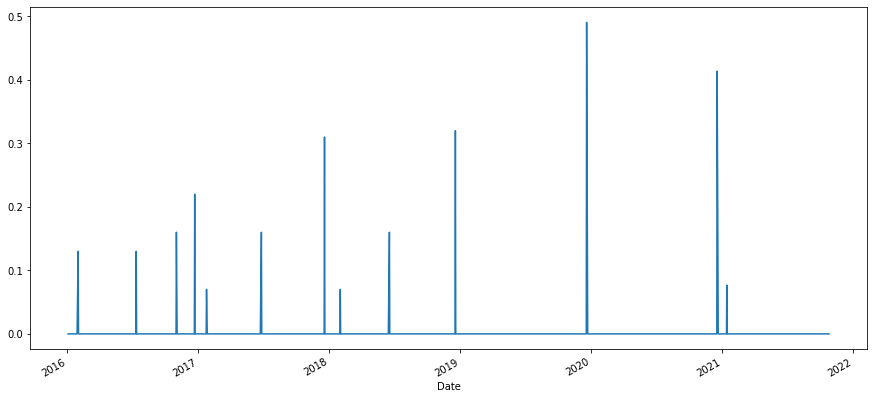

In [ ]:
ambev_d.set_index('Date')['Dividends'].plot(figsize=(15,7))

In [ ]:
dividends = ambev[ambev['Dividends'] > 0]
dividends.reset_index(inplace=True)
dividends = dividends.iloc[:,1:]
dividends

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Day,Month,Year,Rentability,Rentability pure
0,2016-02-01,15.830378,16.037876,15.484548,15.908190,12665300,0.1300,0,1,2,2016,-0.701574,-0.112396
1,2016-07-12,16.851105,16.877217,16.720543,16.798880,7635600,0.1300,0,12,7,2016,0.155690,0.026114
2,2016-11-01,16.495134,16.539027,16.091314,16.091314,19058400,0.1600,0,1,11,2016,-1.821094,-0.298473
3,2016-12-22,14.433339,14.451137,14.050705,14.077400,13056700,0.2200,0,22,12,2016,-1.861048,-0.266955
4,2017-01-24,15.438907,15.590794,15.304887,15.456775,11136000,0.0700,0,24,1,2017,0.173701,0.026802
5,2017-06-26,16.431829,16.576047,16.377748,16.467884,7566700,0.1600,0,26,6,2017,1.050898,0.171261
6,2017-12-19,18.884075,18.893224,18.719388,18.838329,8259800,0.3100,0,19,12,2017,-0.048535,-0.009148
7,2018-02-01,20.220308,20.670056,20.220308,20.403877,23424100,0.0700,0,1,2,2018,1.599646,0.321251
8,2018-06-18,16.941513,17.339592,16.802648,17.163698,19846300,0.1600,0,18,6,2018,-0.107744,-0.018513
9,2018-12-19,14.927913,15.012946,14.549991,14.549991,13065100,0.3200,0,19,12,2018,-1.028285,-0.151170


<AxesSubplot:>

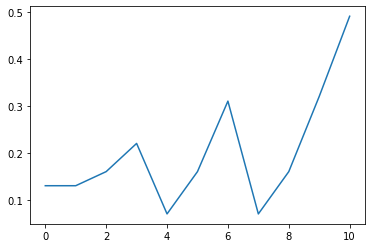

In [ ]:
dividends['Dividends'].plot()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Day,Month,Year,Rentability,Rentability pure
0,2016-02-01,15.830378,16.037876,15.484548,15.908190,12665300,0.1300,0,1,2,2016,-0.701574,-0.112396
1,2016-07-12,16.851105,16.877217,16.720543,16.798880,7635600,0.1300,0,12,7,2016,0.155690,0.026114
2,2016-11-01,16.495134,16.539027,16.091314,16.091314,19058400,0.1600,0,1,11,2016,-1.821094,-0.298473
3,2016-12-22,14.433339,14.451137,14.050705,14.077400,13056700,0.2200,0,22,12,2016,-1.861048,-0.266955
4,2017-01-24,15.438907,15.590794,15.304887,15.456775,11136000,0.0700,0,24,1,2017,0.173701,0.026802
5,2017-06-26,16.431829,16.576047,16.377748,16.467884,7566700,0.1600,0,26,6,2017,1.050898,0.171261
6,2017-12-19,18.884075,18.893224,18.719388,18.838329,8259800,0.3100,0,19,12,2017,-0.048535,-0.009148
7,2018-02-01,20.220308,20.670056,20.220308,20.403877,23424100,0.0700,0,1,2,2018,1.599646,0.321251
8,2018-06-18,16.941513,17.339592,16.802648,17.163698,19846300,0.1600,0,18,6,2018,-0.107744,-0.018513
9,2018-12-19,14.927913,15.012946,14.549991,14.549991,13065100,0.3200,0,19,12,2018,-1.028285,-0.151170
